In [21]:
import pandas as pd

df = pd.read_csv("dataset.csv")

## Quick Data Check

- Inspect schema, missing values, and distribution summary before transforming
- Keeps transformation choices aligned with the latest dataset

In [22]:
df.info()
print("\nMissing values per column:")
print(df.isna().sum())
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   20 non-null     int64  
 1   Age                  20 non-null     int64  
 2   AnnualIncome         20 non-null     int64  
 3   SpendingScore        20 non-null     int64  
 4   Tenure               20 non-null     int64  
 5   Transactions         20 non-null     int64  
 6   Debt                 20 non-null     int64  
 7   PurchaseProbability  20 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 1.4 KB

Missing values per column:
ID                     0
Age                    0
AnnualIncome           0
SpendingScore          0
Tenure                 0
Transactions           0
Debt                   0
PurchaseProbability    0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
ID,20.0,10.500,5.916080,1.00,5.75,10.500,15.2500,20.00
Age,20.0,38.700,10.877790,22.00,30.50,38.500,45.7500,60.00
AnnualIncome,20.0,84600.000,46518.134551,31000.00,47750.00,75000.000,107250.0000,200000.00
SpendingScore,20.0,50.250,21.376020,18.00,32.75,50.500,65.5000,87.00
Tenure,20.0,5.600,4.031455,1.00,3.00,3.500,8.2500,15.00
Transactions,20.0,18.850,8.634539,6.00,11.75,18.500,25.0000,34.00
Debt,20.0,34775.000,39855.157165,4000.00,8750.00,16500.000,38750.0000,150000.00
PurchaseProbability,20.0,0.348,0.254922,0.02,0.15,0.295,0.5375,0.77


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_theme(style="whitegrid")

def plot_distribution(series, name):
    """Visualize distribution with histogram, KDE, and Q-Q plot."""
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(series, kde=True, bins=20, color="skyblue", alpha=0.6)
    plt.title(f"{name} Histogram + KDE")
    plt.xlabel(name)
    plt.ylabel("Density")

    plt.subplot(1, 3, 2)
    sns.kdeplot(series, fill=True, color="orange")
    plt.title(f"{name} KDE")
    plt.xlabel(name)
    plt.ylabel("Density")

    plt.subplot(1, 3, 3)
    stats.probplot(series, dist="norm", plot=plt)
    plt.title(f"{name} Q-Q Plot")

    plt.tight_layout()
    plt.show()

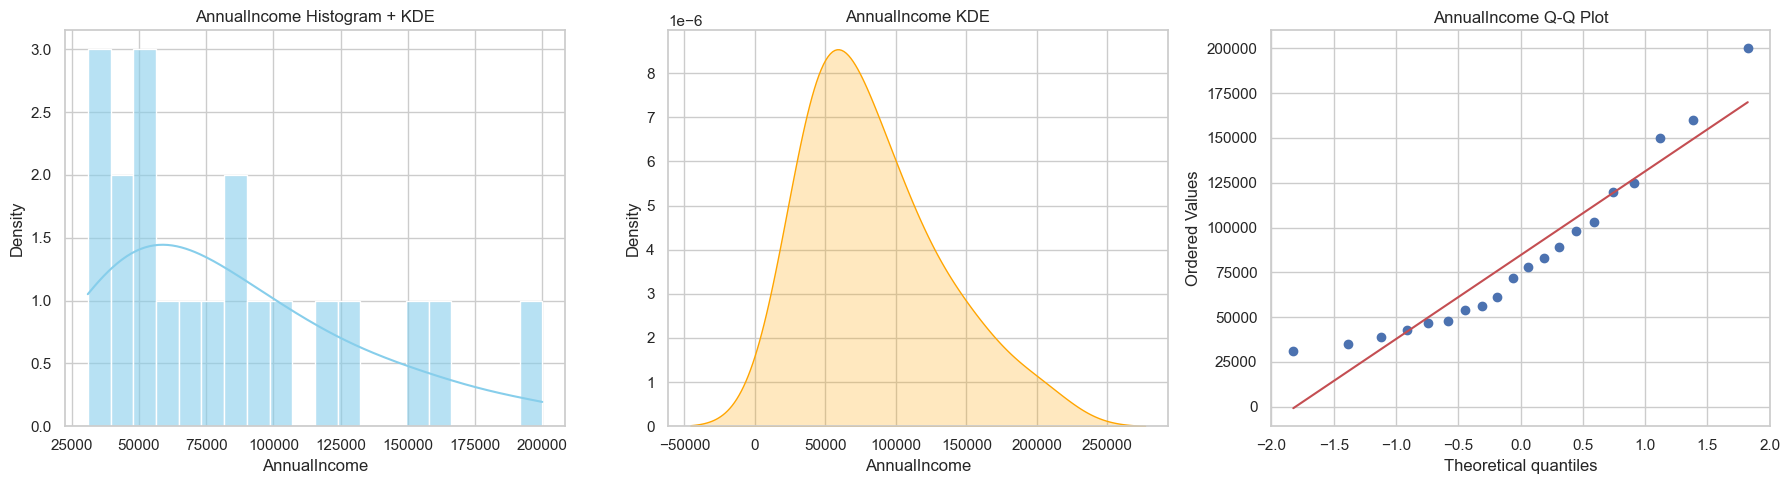

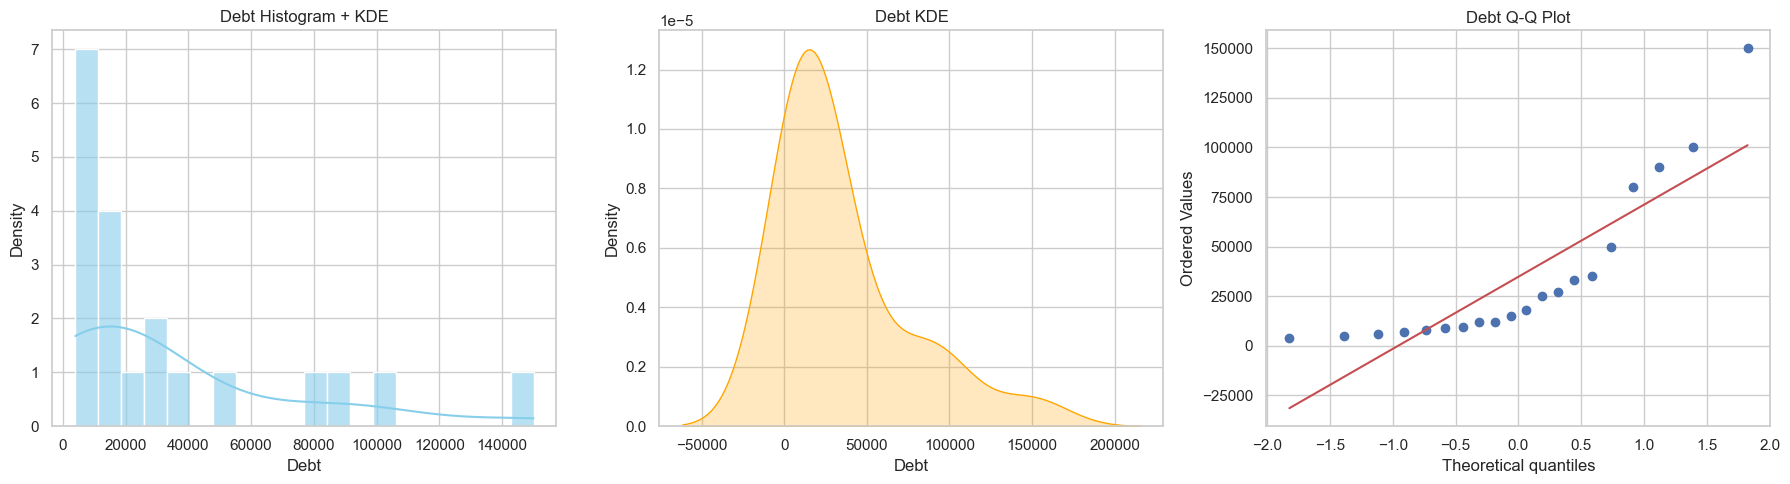

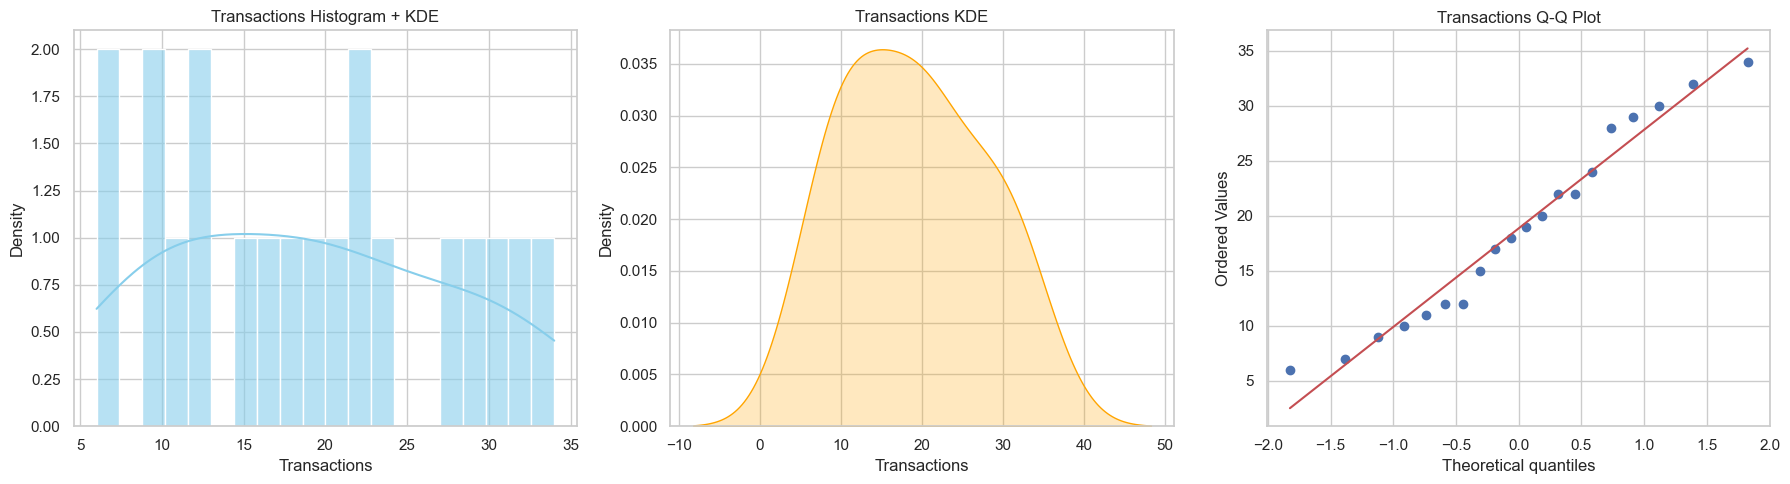

In [24]:
plot_distribution(df["AnnualIncome"], "AnnualIncome")
plot_distribution(df["Debt"], "Debt")
plot_distribution(df["Transactions"], "Transactions")

# FunctionTransformer

- Apply element-wise transformations (log, exponential, etc.) within pipelines
- Helpful for stabilizing variance or reducing skew before modeling
- Use `np.log1p` to safely log-transform values containing zeros

In [25]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

df_function = df.copy()
transformer = FunctionTransformer(np.log1p)
df_function["AnnualIncome_log1p"] = transformer.fit_transform(df_function[["AnnualIncome"]])

df_function[["AnnualIncome", "AnnualIncome_log1p"]].head()

,AnnualIncome,AnnualIncome_log1p
0,35000,10.463132
1,78000,11.264477
2,54000,10.896758
3,120000,11.695255
4,98000,11.492733


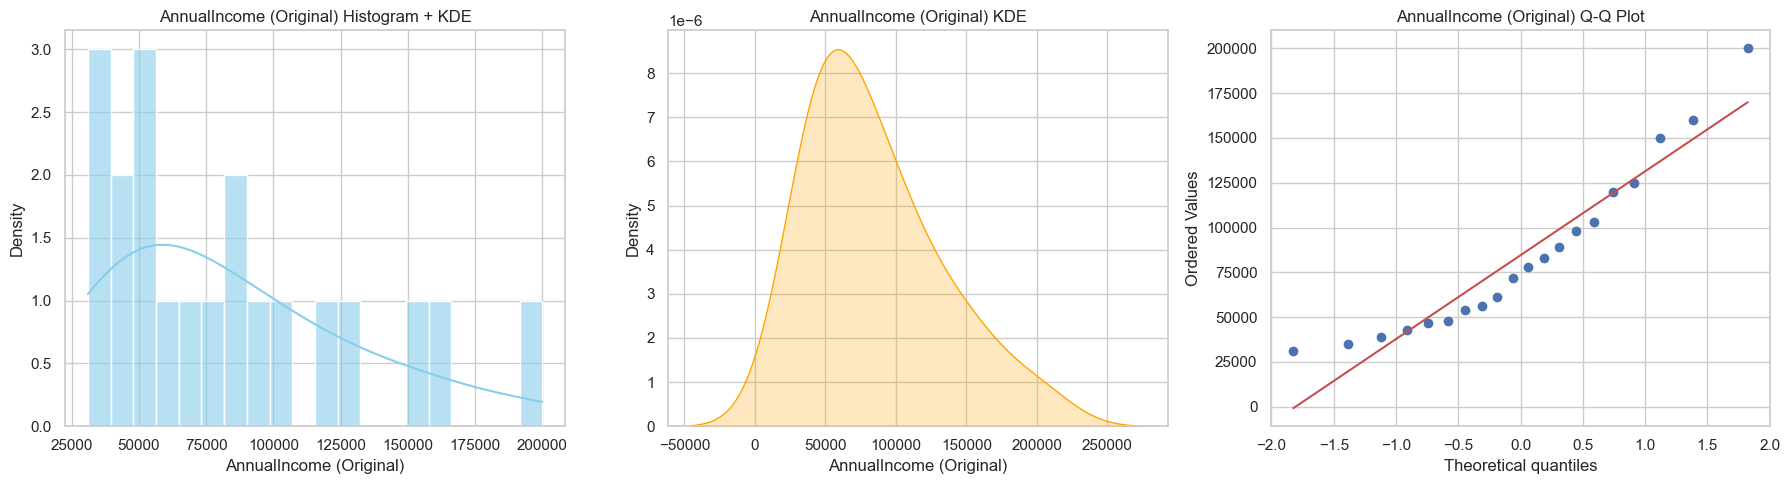

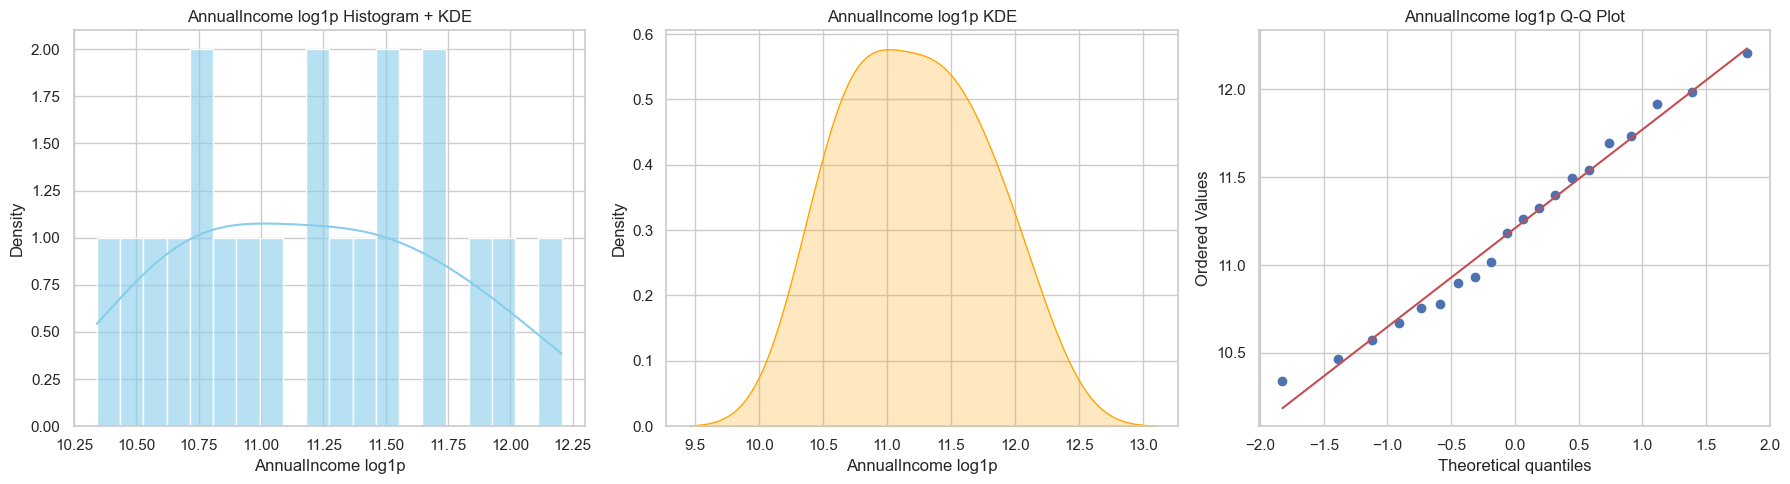

In [26]:
plot_distribution(df["AnnualIncome"], "AnnualIncome (Original)")
plot_distribution(df_function["AnnualIncome_log1p"], "AnnualIncome log1p")

# PowerTransformer

- Reduces skewness and stabilizes variance using Box-Cox or Yeo-Johnson
- Box-Cox requires strictly positive values; Yeo-Johnson handles zero/negative
- Often improves performance for linear models or distance-based algorithms

In [27]:
from sklearn.preprocessing import PowerTransformer

df_power = df.copy()
pt_boxcox = PowerTransformer(method="box-cox")
df_power["Debt_boxcox"] = pt_boxcox.fit_transform(df_power[["Debt"]])

df_power[["Debt", "Debt_boxcox"]].head()

,Debt,Debt_boxcox
0,5000,-1.436443
1,12000,-0.410212
2,8000,-0.863200
3,35000,0.623121
4,50000,0.921086


In [28]:
pt_yeojohnson = PowerTransformer(method="yeo-johnson")
df_power["Debt_yeojohnson"] = pt_yeojohnson.fit_transform(df_power[["Debt"]])

df_power[["Debt", "Debt_yeojohnson"]].head()

,Debt,Debt_yeojohnson
0,5000,-1.436431
1,12000,-0.410225
2,8000,-0.863213
3,35000,0.623128
4,50000,0.921095


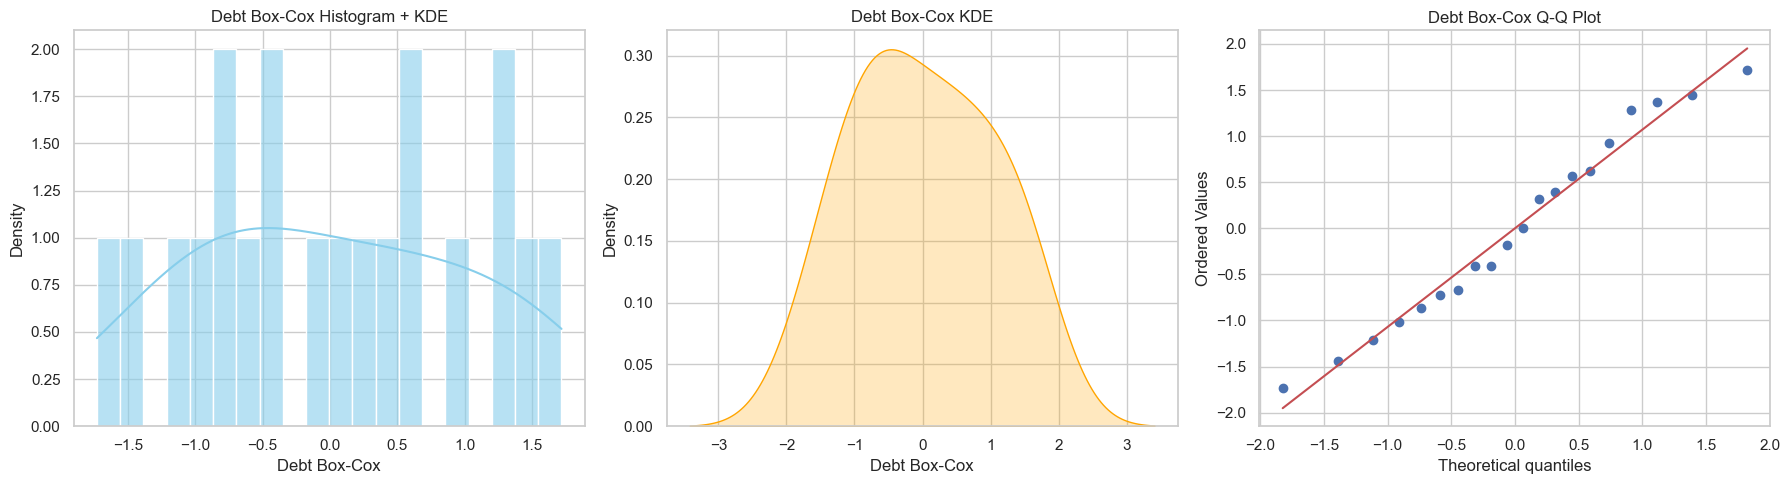

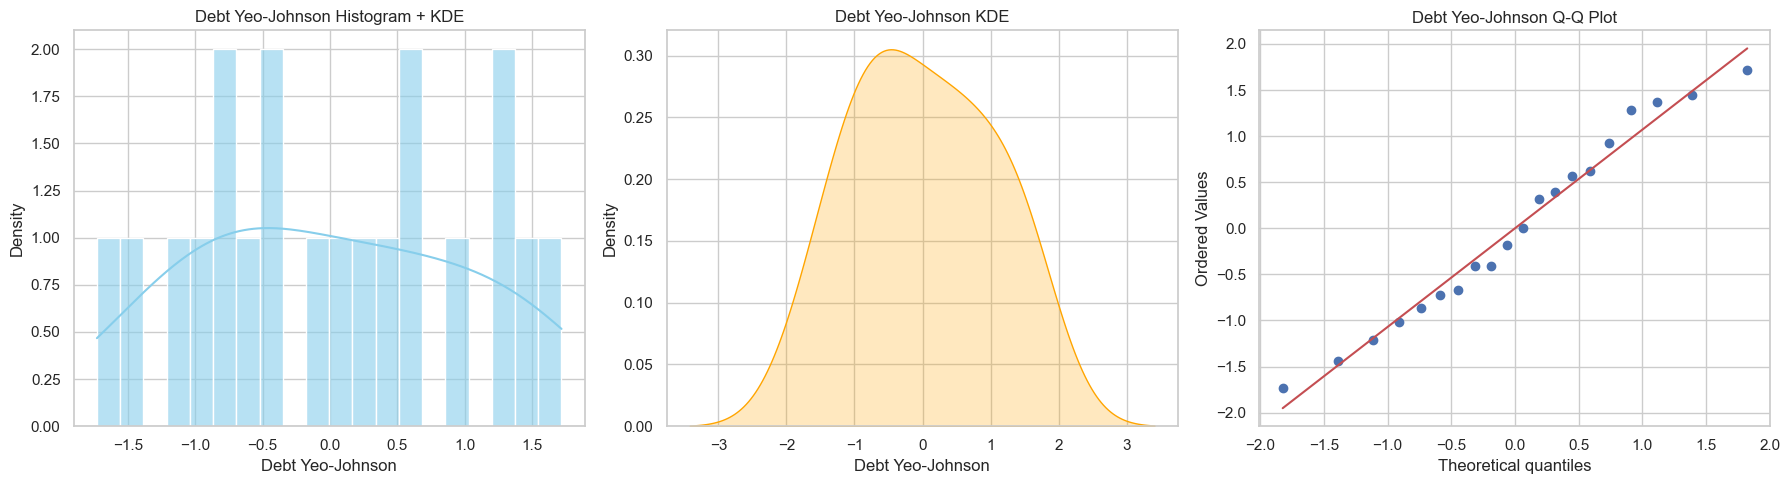

In [29]:
plot_distribution(df_power["Debt_boxcox"], "Debt Box-Cox")
plot_distribution(df_power["Debt_yeojohnson"], "Debt Yeo-Johnson")